In [26]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models #to implement CNN
import ssl #for dataset


############################ Data pre-processing #######################################
# load built-in cifar10 dataset
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


# reshape training set and test set
x_train = x_train.reshape(50000, 32, 32, 3).astype("float32") 
x_test = x_test.reshape(10000, 32, 32, 3).astype("float32") 
y_train = y_train.reshape(50000,)
y_test = y_test.reshape(10000,)

#feature scaling
x_train = x_train/255
x_test = x_test/255



############################ building the CNN #######################################

cnn = models.Sequential()

############### add the layers #################
#1st convolution
cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32, 32, 3])) #convolution layer
cnn.add(layers.MaxPool2D(pool_size=2, strides=2)) #pooling layer

#2nd convolution
cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu')) #convolution layer
cnn.add(layers.MaxPool2D(pool_size=2, strides=2)) #pooling layer

#flattening
cnn.add(layers.Flatten())

#ann
cnn.add(layers.Dense(units=128, activation='relu')) #hidden layer
cnn.add(layers.Dense(units=10, activation='softmax')) #output layer


############### compile the ANN #################
cnn.compile(optimizer = 'adam', loss = keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
#loss function for multi-class classifcation


############### training and validating #################
cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)
  # test_set is actually the validation set
  # performance metric for validation set is "accuracy"



Epoch 1/10
1563/1563 [==============================] - 30s 18ms/step - loss: 1.4331 - accuracy: 0.4848 - val_loss: 1.1737 - val_accuracy: 0.5898
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1021 - accuracy: 0.6126 - val_loss: 1.0322 - val_accuracy: 0.6416
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9783 - accuracy: 0.6567 - val_loss: 0.9639 - val_accuracy: 0.6663
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8808 - accuracy: 0.6932 - val_loss: 0.9697 - val_accuracy: 0.6669
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8088 - accuracy: 0.7186 - val_loss: 0.9382 - val_accuracy: 0.6747
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7370 - accuracy: 0.7431 - val_loss: 0.9412 - val_accuracy: 0.6787
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6779 - accuracy: 0.7631 - val_loss: 0.9109 -

In [31]:
############################ testing a single prediction#######################################

############### function for testing #################
def classify(img) :
  predictions = cnn.predict(img)
  index = np.argmax(predictions, axis=1)

  if index==0 : return "airplane"
  elif index == 1 : return "automobile"
  elif index == 2 : return "bird"
  elif index == 3 : return "cat"
  elif index == 4 : return "deer"
  elif index == 5 : return "dog"
  elif index == 6 : return "frog"
  elif index == 7 : return "horse"
  elif index == 8 : return "ship"
  else : return "truck"




############### testing #################
import numpy as np
from keras import utils

#pre-process the image
input_img = utils.load_img("C:\\Users\\Samruddhi\\Desktop\\Neural Networks\\datasets\\cats and dogs dataset\\dataset\\my images\\WhatsApp Image 2023-04-14 at 11.03.46 PM.jpeg", target_size = (32, 32)) #PIL format
input_img = utils.img_to_array(input_img) #predict() method expects a 2D array as input
input_img = np.array([input_img])  # Convert single image to a batch.

#feature scaling
input_img = input_img/255. 

#predict
prediction = classify(input_img)
print(prediction)

1/1 [==============================] - 0s 24ms/step
dog


1/1 [==============================] - 0s 25ms/step


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


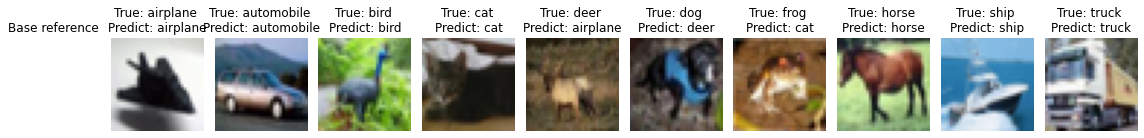

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

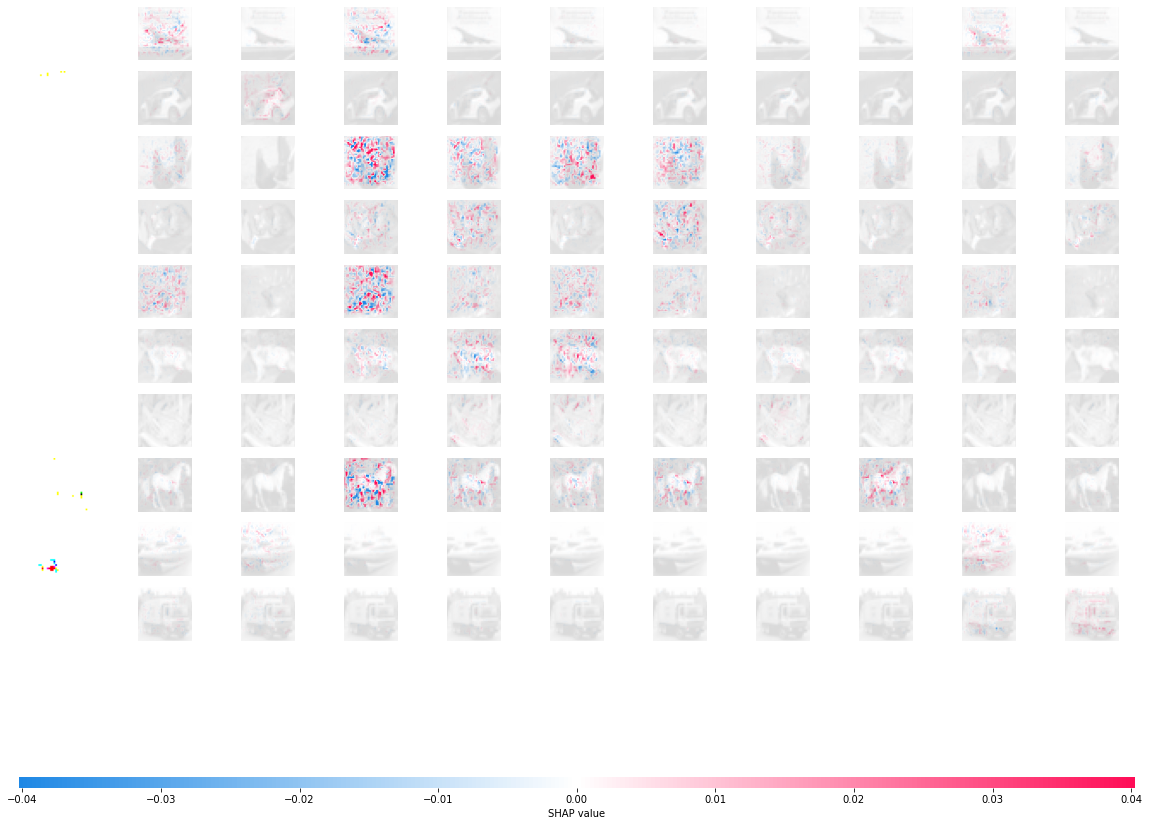

In [32]:
import shap
import matplotlib.pyplot as plt

# class label list
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

######################### an image from each class ######################
# example image for each class
images_dict = dict()
for i, label in enumerate(y_train):
  if len(images_dict)==10: #all classes done
    break
  if label not in images_dict.keys():
    images_dict[label] = x_train[i].reshape((32, 32,3))
images_dict = dict(sorted(images_dict.items()))
    

# example image for each class for test set
x_test_dict = dict()
for i, l in enumerate(y_test):
  if len(x_test_dict)==10:
    break
  if l not in x_test_dict.keys():
    x_test_dict[l] = x_test[i]

# order by class
x_test_each_class = [x_test_dict[i] for i in sorted(x_test_dict)]
x_test_each_class = np.asarray(x_test_each_class)

# Compute predictions
predictions = cnn.predict(x_test_each_class)
predicted_class = np.argmax(predictions, axis=1)



############################## plotting #################################
# plot actual and predicted class
def plot_actual_predicted(images, pred_classes):
  fig, axes = plt.subplots(1, 11, figsize=(16, 15))
  axes = axes.flatten()
  
  # plot
  ax = axes[0]
  dummy_array = np.array([[[0, 0, 0, 0]]], dtype='uint8')
  ax.set_title("Base reference")
  ax.set_axis_off()
  ax.imshow(dummy_array, interpolation='nearest')

  # plot image
  for k,v in images.items():
    ax = axes[k+1]
    ax.imshow(v, cmap=plt.cm.binary)
    ax.set_title(f"True: %s \nPredict: %s" % (class_names[k], class_names[pred_classes[k]]))
    ax.set_axis_off()
  plt.tight_layout()
  plt.show()


############################# generate shap values ###############################
# select backgroud for shap
background = x_train[np.random.choice(x_train.shape[0], 1000, replace=False)]

# DeepExplainer to explain predictions of the model
explainer = shap.DeepExplainer(cnn, background)
# compute shap values
shap_values = explainer.shap_values(x_test_each_class)


############################## visualise shap values ############################
# plot SHAP values
plot_actual_predicted(images_dict, predicted_class)
print()
shap.image_plot(shap_values, x_test_each_class * 255)
